<a href="https://colab.research.google.com/github/ValdazoAmerico/tensorflow-linear-regression/blob/main/tf_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerias
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#Creamos una sesión gráfica
sess = tf.Session()

In [7]:
#Cargamos los datos
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [8]:
#Declaramos el tamaño del batch
batch_size=25

In [9]:
#Inicializamos placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#Creamos las variables para la regresión lineal
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [12]:
#Declaramos la opreación del modelo
model_output = tf.add(tf.matmul(x_data, A), b)

#Declaramos la función Loss (L2 Loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [13]:
#Declaramos optimizador
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

#Inicializamos las variables
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [15]:
#Training loop
loss_vec = []
for i in range(100):
  rand_index = np.random.choice(len(x_vals), size=batch_size)
  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])
  sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
  temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
  loss_vec.append(temp_loss)
  if(i+1)%25==0:
    print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
    print('Loss " ' + str(temp_loss))

Step #25 A = [[1.9246063]] b = [[3.2394903]]
Loss " 1.2424394
Step #50 A = [[1.4690267]] b = [[3.813482]]
Loss " 0.5208499
Step #75 A = [[1.273156]] b = [[4.2423396]]
Loss " 0.41188386
Step #100 A = [[1.102301]] b = [[4.465177]]
Loss " 0.22215347


In [16]:
#Obtenemos los coeficients óptimos
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

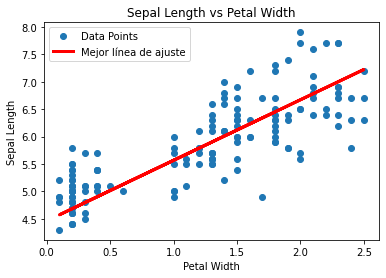

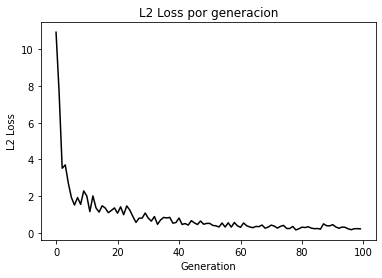

In [17]:
#Resultado gráfico
plt.plot(x_vals,y_vals, 'o',label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Mejor línea de ajuste', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

#Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss por generacion')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')

plt.show()
